In [1]:
import pandas as pd

In [2]:
games_df= pd.read_csv('/kaggle/input/global-video-game-sales/vgchartz-2024.csv')

In [3]:
games_df.squeeze().head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [4]:
pd.isnull(games_df).sum()

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

In [5]:
games_df.columns

Index(['img', 'title', 'console', 'genre', 'publisher', 'developer',
       'critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales',
       'other_sales', 'release_date', 'last_update'],
      dtype='object')

In [6]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


In [7]:
games_df['img']=games_df['img'].astype(dtype=str)

In [8]:

games_renamed=games_df.rename(columns= {'title':'Title','genre':'Genre','publisher':'Publisher','developer':'Developer'})

In [9]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


In [10]:
games_renamed.columns

Index(['img', 'Title', 'console', 'Genre', 'Publisher', 'Developer',
       'critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales',
       'other_sales', 'release_date', 'last_update'],
      dtype='object')

In [11]:
games_renamed['release_date']= pd.to_datetime(games_renamed['release_date'])

In [12]:
type(games_renamed['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
games_renamed['release_year']=games_renamed['release_date'].dt.year

In [14]:
pd.isnull(games_renamed['release_year']).sum()

7051

In [15]:
annual_sales=games_renamed.groupby('release_year').agg({'total_sales':sum})

/tmp/ipykernel_13/244748006.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  annual_sales=games_renamed.groupby('release_year').agg({'total_sales':sum})


In [16]:
annual_sales.sort_values(by='total_sales',ascending=False)

,total_sales
release_year,
2008.0,538.11
2009.0,495.36
2010.0,454.02
2011.0,440.32
2007.0,436.39
2002.0,314.50
2005.0,313.48
2003.0,300.89
2014.0,292.11


In [17]:
games_renamed.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,img,Title,console,Genre,Publisher,Developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,release_year
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN,2013.0
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03,2014.0
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN,2002.0
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN,2013.0
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14,2015.0


In [18]:
top_10_titles=games_renamed.loc[:,['Title','total_sales']].sort_values(by='total_sales',ascending=False).head(10)
top_10_titles

,Title,total_sales
0,Grand Theft Auto V,20.32
1,Grand Theft Auto V,19.39
2,Grand Theft Auto: Vice City,16.15
3,Grand Theft Auto V,15.86
4,Call of Duty: Black Ops 3,15.09
5,Call of Duty: Modern Warfare 3,14.82
6,Call of Duty: Black Ops,14.74
7,Red Dead Redemption 2,13.94
8,Call of Duty: Black Ops II,13.86
9,Call of Duty: Black Ops II,13.80


In [19]:
top_10_title=games_renamed.groupby('Title').agg({'total_sales':sum}).sort_values(by='total_sales',ascending=False).head(10)

/tmp/ipykernel_13/1810946775.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  top_10_title=games_renamed.groupby('Title').agg({'total_sales':sum}).sort_values(by='total_sales',ascending=False).head(10)


In [20]:
top_10_title

,total_sales
Title,
Grand Theft Auto V,64.29
Call of Duty: Black Ops,30.99
Call of Duty: Modern Warfare 3,30.71
Call of Duty: Black Ops II,29.59
Call of Duty: Ghosts,28.80
Call of Duty: Black Ops 3,26.72
Call of Duty: Modern Warfare 2,25.02
Minecraft,24.01
Grand Theft Auto IV,22.53


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

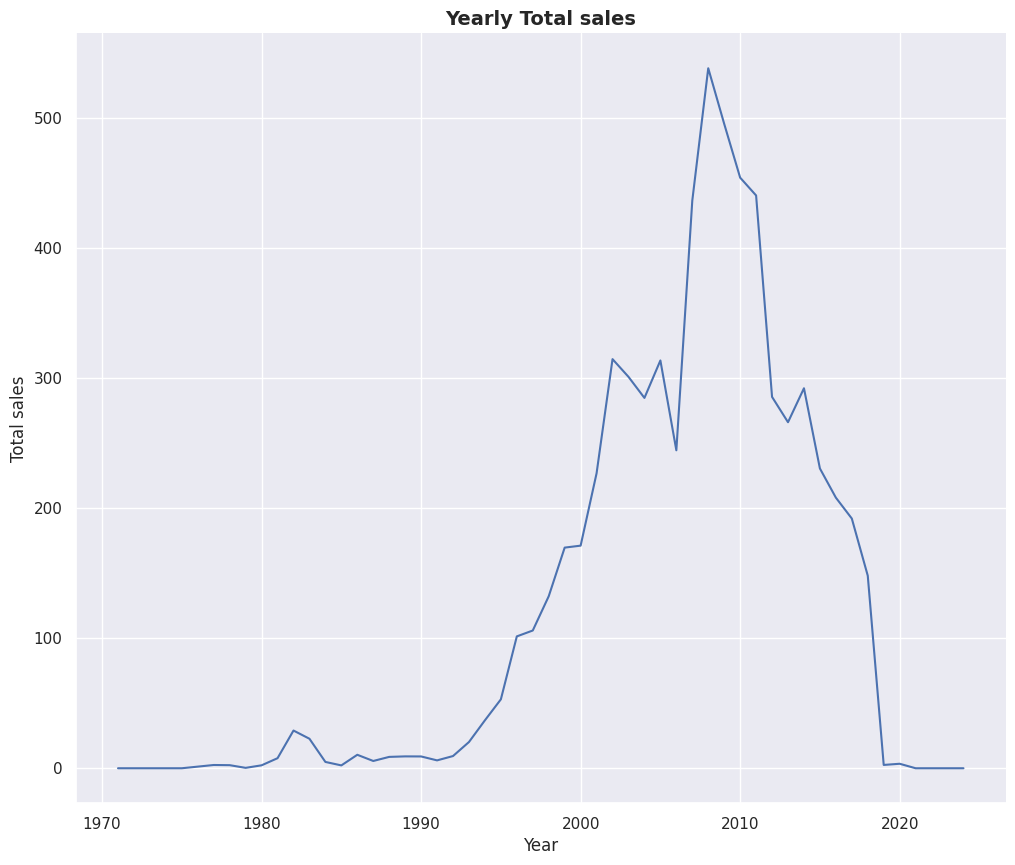

In [22]:
plt.figure(figsize=(12,10))
plt.plot(annual_sales.index, annual_sales.values)
plt.title('Yearly Total sales', fontsize=14, weight='bold')
plt.ylabel('Total sales')
plt.xlabel('Year')
sns.despine()
plt.show()

<Axes: xlabel='Title'>

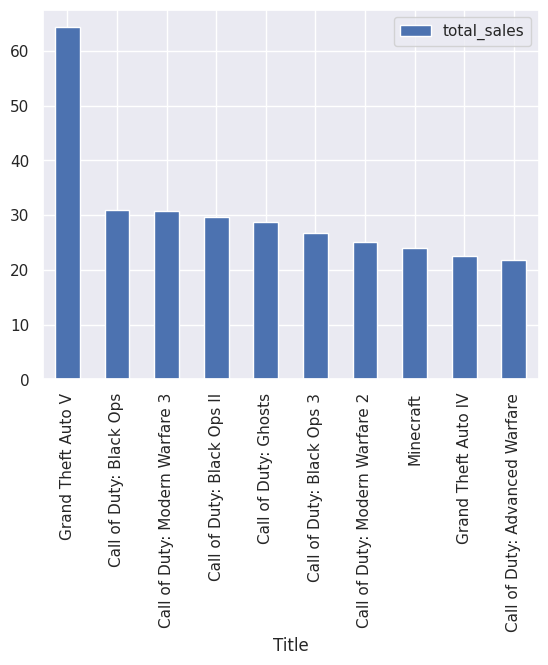

In [23]:
top_10_title.plot(kind='bar')